# Hudson and Thames Challenge

## Introduction

As part of the Hudson and Thames Skill Set Challenge, I completed a series of problems to showcase my ability. I started by importing last year's financial data from yfinance. Then, I implemented the distance metric on a group of fifty largest shares on the S&P 500. With the resulting dataframe, I used the Kruskal's Algorithm to find the minimum spanning tree for the distances associated with each ticker. To better understand the associatiations between the companies, I utilized networkx and seaborn to visualize the graphs.

## Implementing Distance Metric

In [1]:
import yfinance as yf
import pandas as pd
import helper

### Download data from yfinance

Download the tickers and names for the 50 largest S&P 500 stocks as of April 1st, 2020.

In [2]:
fifty_largest = pd.read_csv("50 Largest SP500.csv")
ticker = list(fifty_largest['Ticker'])
data = yf.download(ticker, period = '1y', interval = '1d')

[*********************100%***********************]  50 of 50 completed


Clean the data accordingly and displayed the first 5 rows

### Clean data

In [3]:
# Remove the unnecessary volume column
data = data['Adj Close']
# Remove NaN
data = data.dropna(how='all')
data.head()

,AAPL,ABBV,ABT,ACN,ADBE,AMGN,AMZN,BAC,BMY,BRK-B,...,PYPL,T,TMO,UNH,UNP,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-03,192.826111,78.539551,78.233322,174.308746,271.500000,187.344147,1820.699951,28.162745,44.985519,203.669998,...,104.690002,30.078032,276.021515,241.627731,165.804184,157.496414,56.482059,46.899422,95.351402,76.954727
2019-04-04,193.161682,78.284302,77.367348,174.279221,267.890015,186.771210,1818.859985,28.465464,45.179134,204.100006,...,104.459999,30.181849,274.316040,243.151169,165.002579,156.681396,56.597191,47.196983,96.253990,78.048653
2019-04-05,194.454758,78.889320,77.741295,175.253128,267.450012,189.762207,1837.280029,28.397108,45.150085,205.330002,...,105.730003,30.531042,275.752228,244.517349,164.934174,156.691330,56.693134,46.822628,96.960373,78.467178
2019-04-08,197.514709,79.390358,77.268929,176.000793,268.809998,189.247528,1849.859985,28.484993,45.295296,205.250000,...,106.570000,30.568792,277.677063,244.487854,164.904831,156.790710,56.731514,46.918621,97.352806,78.952309
2019-04-09,196.922470,78.170853,77.416542,174.839966,268.989990,187.402420,1835.839966,28.211567,44.511169,204.919998,...,106.930000,30.444141,277.058685,244.527176,162.363174,156.532318,56.607925,46.208313,96.823021,77.934494


### Calculate the log prices

Calculate the log of daily prices

In [4]:
log_price = helper.calc_log(data)
log_price.head()

,AAPL,ABBV,ABT,ACN,ADBE,AMGN,AMZN,BAC,BMY,BRK-B,...,PYPL,T,TMO,UNH,UNP,V,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-03,5.261789,4.363602,4.359696,5.160828,5.603962,5.232947,7.506976,3.338000,3.806341,5.316501,...,4.651004,3.403795,5.620479,5.487398,5.110807,5.059403,4.033923,3.848005,4.557569,4.343217
2019-04-04,5.263528,4.360347,4.348565,5.160659,5.590577,5.229884,7.505965,3.348692,3.810635,5.318610,...,4.648804,3.407241,5.614281,5.493683,5.105961,5.054214,4.035959,3.854330,4.566990,4.357332
2019-04-05,5.270200,4.368046,4.353387,5.166231,5.588933,5.245772,7.516042,3.346287,3.809992,5.324618,...,4.660889,3.418744,5.619503,5.499286,5.105546,5.054278,4.037653,3.846367,4.574302,4.362680
2019-04-08,5.285813,4.374377,4.347292,5.170489,5.594005,5.243056,7.522865,3.349377,3.813203,5.324229,...,4.668802,3.419980,5.626459,5.499166,5.105369,5.054912,4.038330,3.848415,4.578342,4.368844
2019-04-09,5.282810,4.358897,4.349200,5.163871,5.594674,5.233258,7.515257,3.339732,3.795740,5.322620,...,4.672174,3.415894,5.624229,5.499326,5.089836,5.053262,4.036149,3.833160,4.572885,4.355869


### Calculate the log returns

Calculate the log returns of daily prices

In [5]:
diff_price = helper.calc_diff(log_price)
diff_price.head()

,AAPL,ABBV,ABT,ACN,ADBE,AMGN,AMZN,BAC,BMY,BRK-B,...,PYPL,T,TMO,UNH,UNP,V,VZ,WFC,WMT,XOM
0,0.001739,-0.003255,-0.011131,-0.000169,-0.013386,-0.003063,-0.001011,0.010692,0.004295,0.002109,...,-0.002199,0.003446,-0.006198,0.006285,-0.004846,-0.005188,0.002036,0.006325,0.009421,0.014115
1,0.006672,0.007699,0.004822,0.005573,-0.001644,0.015887,0.010076,-0.002404,-0.000643,0.006008,...,0.012084,0.011503,0.005222,0.005603,-0.000415,0.000063,0.001694,-0.007963,0.007312,0.005348
2,0.015614,0.006331,-0.006095,0.004257,0.005072,-0.002716,0.006824,0.003090,0.003211,-0.000390,...,0.007913,0.001236,0.006956,-0.000121,-0.000178,0.000634,0.000677,0.002048,0.004039,0.006164
3,-0.003003,-0.015480,0.001909,-0.006617,0.000669,-0.009798,-0.007608,-0.009645,-0.017463,-0.001609,...,0.003372,-0.004086,-0.002229,0.000161,-0.015533,-0.001649,-0.002181,-0.015255,-0.005457,-0.012975
4,0.005598,0.003139,0.003806,0.004133,0.009583,0.004704,0.006239,0.006211,-0.001959,-0.001954,...,0.005409,0.004086,0.003773,-0.011156,0.001564,0.006771,0.003589,-0.007297,0.009179,-0.004526


### Calculate the correlation

Calculate the correlation matrix with the pearson method for daily log returns

In [6]:
corr = helper.calc_corr(diff_price)
corr.head()

,AAPL,ABBV,ABT,ACN,ADBE,AMGN,AMZN,BAC,BMY,BRK-B,...,PYPL,T,TMO,UNH,UNP,V,VZ,WFC,WMT,XOM
AAPL,1.000000,0.608926,0.731578,0.779021,0.764732,0.699235,0.683451,0.817004,0.604653,0.822746,...,0.780827,0.701870,0.640534,0.660529,0.729739,0.810450,0.560532,0.775935,0.585318,0.709866
ABBV,0.608926,1.000000,0.580612,0.603684,0.576010,0.505923,0.468145,0.627963,0.523759,0.583702,...,0.578225,0.576499,0.515523,0.579339,0.559657,0.619060,0.501824,0.577046,0.383441,0.529507
ABT,0.731578,0.580612,1.000000,0.757431,0.639813,0.734786,0.533032,0.765949,0.611893,0.736886,...,0.730916,0.743074,0.796370,0.712830,0.610735,0.776247,0.646360,0.716921,0.611606,0.616671
ACN,0.779021,0.603684,0.757431,1.000000,0.777605,0.664652,0.665364,0.814006,0.586057,0.791959,...,0.815729,0.712345,0.656173,0.664284,0.732956,0.847627,0.635760,0.784061,0.573410,0.684875
ADBE,0.764732,0.576010,0.639813,0.777605,1.000000,0.622214,0.749404,0.736349,0.528391,0.754121,...,0.824145,0.606119,0.517637,0.616352,0.670694,0.778564,0.541400,0.717516,0.605358,0.627861


### Calculate the distance

Calculate the distance matrix with the given formula from the aforementioned paper

In [7]:
dist = helper.calc_dist(corr)
dist.head()

,AAPL,ABBV,ABT,ACN,ADBE,AMGN,AMZN,BAC,BMY,BRK-B,...,PYPL,T,TMO,UNH,UNP,V,VZ,WFC,WMT,XOM
AAPL,0.000000,0.884391,0.732697,0.664799,0.685957,0.775583,0.795675,0.604973,0.889210,0.595406,...,0.662077,0.772178,0.847899,0.823979,0.735202,0.615711,0.937516,0.669425,0.910695,0.761754
ABBV,0.884391,0.000000,0.915847,0.890298,0.920858,0.994059,1.031363,0.862597,0.975952,0.912467,...,0.918450,0.920327,0.984354,0.917236,0.938448,0.872858,0.998175,0.919732,1.110459,0.970044
ABT,0.732697,0.915847,0.000000,0.696518,0.848748,0.728305,0.966404,0.684180,0.881030,0.725416,...,0.733599,0.716835,0.638169,0.757853,0.882344,0.668960,0.840999,0.752434,0.881356,0.875590
ACN,0.664799,0.890298,0.696518,0.000000,0.666925,0.818961,0.818090,0.609909,0.909882,0.645045,...,0.607077,0.758492,0.829250,0.819410,0.730813,0.552038,0.853511,0.657174,0.923677,0.793883
ADBE,0.685957,0.920858,0.848748,0.666925,0.000000,0.869236,0.707949,0.726156,0.971194,0.701254,...,0.593051,0.887559,0.982205,0.875954,0.811549,0.665486,0.957706,0.751643,0.888417,0.862716


## Create MST by implementing Kruskal's Algorithm

In [8]:
import networkx as nx

Create a MST given the data and returned the resulting graph

In [9]:
new_mst = helper.all_connected(helper.minimum_spanning_tree(dist))

Create a graph connecting all the vertices as reference

In [10]:
new_connected = helper.all_connected(dist)

## MST Visualization

In [11]:
import matplotlib.pyplot as plt

### Visualization for MST graph

Showcase the resulting MST graph

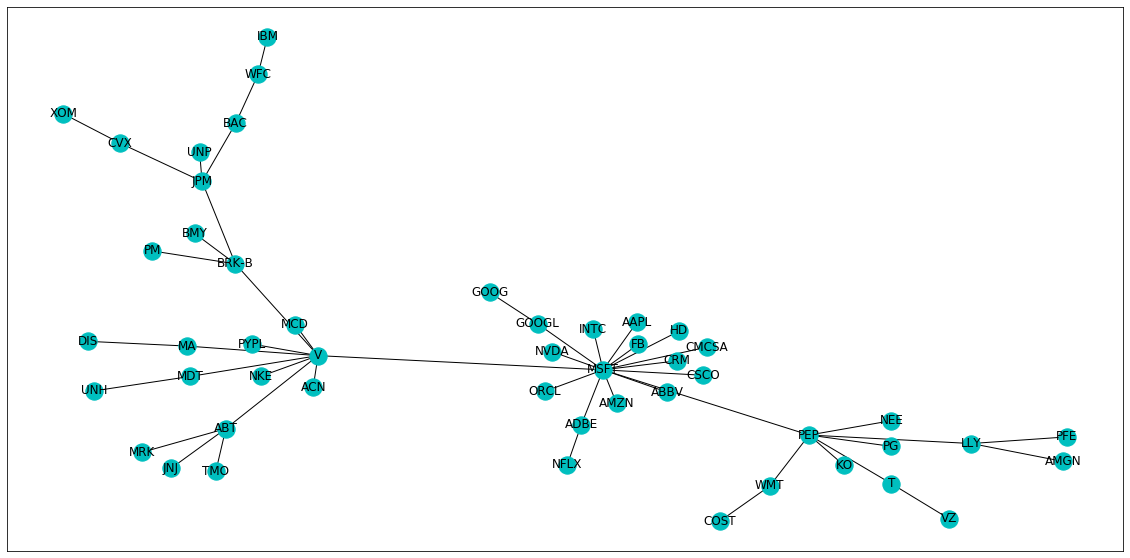

In [12]:
plt.figure(figsize=(20,10))
nx.draw_networkx(new_mst, node_color = 'c')

### Visualization for connected graph

Showcase the resulting complete graph

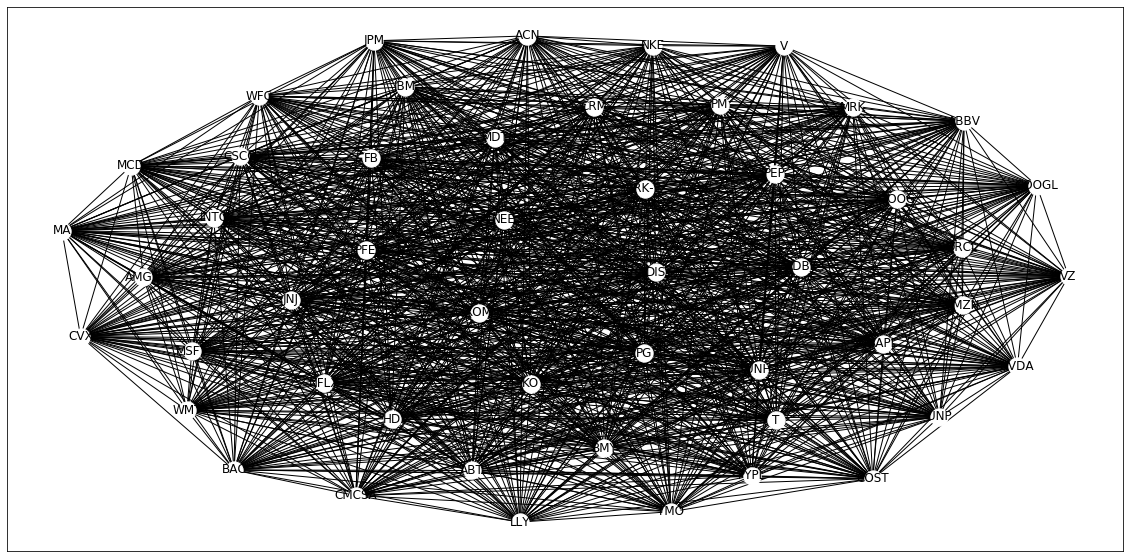

In [13]:
plt.figure(figsize=(20,10))
nx.draw_networkx(new_connected, node_color = 'w')

## Hierarchical Structure

In [14]:
import seaborn as sns

Display a plot for the cluster map resulting from the original distance matrix

/Users/alexkwon/opt/anaconda3/envs/Real/lib/python3.7/site-packages/seaborn/matrix.py:595: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


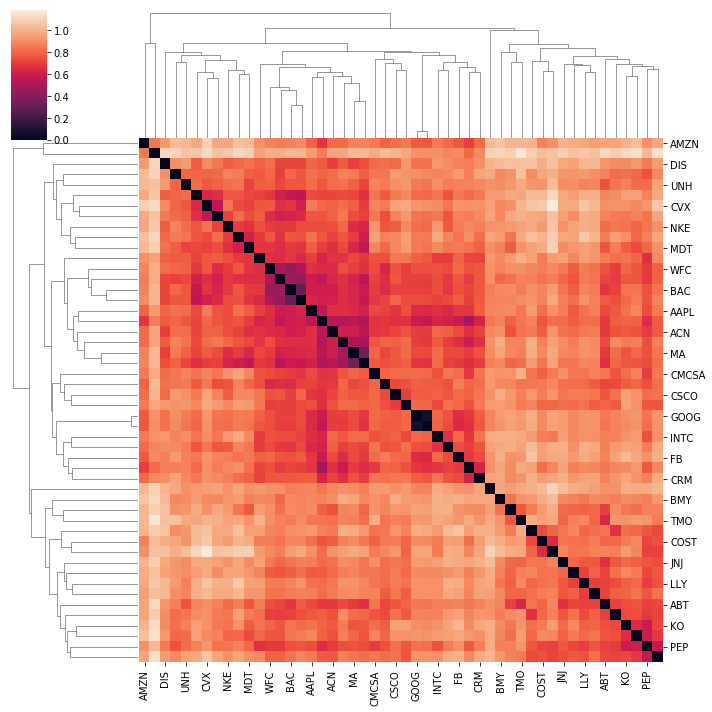

In [15]:
sns.clustermap(dist)

## Conclusion

From this set of challenges, we were able to determine how certain stocks are closely correlated compared to other sets of stocks. Continuing from these problems, it is possible to determine a group of stocks that are statistically correlated in order for researches to capture the arbitrage opportunities presented by the slight deviations that might occur throughout the year.